# Using an API Key with Python

In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

    
    
#NOTE:

# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video   

{'status': {'timestamp': '2023-06-20T09:25:03.204Z', 'error_code': 0, 'error_message': None, 'elapsed': 52, 'credit_count': 1, 'notice': None, 'total_count': 10392}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10247, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

# API  json formate to Dataframe

In [4]:
#To find the type od data

type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)              #This will allow you to see all the column,not just 15

pd.set_option('display.max_rows', None) 

In [6]:
#Normalizing the data

pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-06-20T09:25:03.204Z,0,None,52,1,None,10392


In [7]:
#This normalize attribute will make all the data pretty in data frame

pd.json_normalize(data['data'])                                                  #To get rid of these ... column, we have use pd.set_option('display.max_columns', None) syntax
                                                                                 #That will only give us a proper column.

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940726e+07,1.940726e+07,False,NaN,1,NaN,NaN,None,2023-06-20T09:23:00.000Z,26754.906384,1.486173e+10,61.4673,-0.086559,1.389303,2.291824,-1.149463,-4.724054,-4.809763,5.192393e+11,48.4839,5.618530e+11,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7019,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202063e+08,1.202063e+08,True,NaN,2,NaN,NaN,None,2023-06-20T09:23:00.000Z,1726.768838,5.768611e+09,55.9355,-0.033005,0.297442,-1.390256,-4.932853,-10.153404,-3.455086,2.075684e+11,19.3817,2.075684e+11,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,55712,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317704e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.999523,1.982960e+10,42.5224,-0.038558,-0.022895,-0.043109,-0.075230,-0.055302,-0.204065,8.313738e+10,7.7629,8.854130e+10,None,2023-06-20T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558531e+08,1.558531e+08,False,NaN,4,NaN,NaN,None,2023-06-20T09:23:00.000Z,240.234550,3.788987e+08,9.7509,-0.250734,-0.979675,1.135944,-22.822653,-26.861356,-28.185479,3.744130e+10,3.4961,3.744130e+10,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,13048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.844343e+10,2.844343e+10,False,NaN,5,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.999942,3.391952e+09,70.2512,-0.022636,-0.025040,-0.015416,0.005881,-0.014179,0.114724,2.844178e+10,2.6557,2.844178e+10,None,2023-06-20T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,968,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.484380,8.777881e+08,-2.5276,-0.442919,-0.675673,-8.341912,3.277912,2.792646,7.966700,2.518148e+10,2.3513,4.843801e+10,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492503e+10,3.590566e+10,False,NaN,7,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.257960,1.578520e+08,25.7868,-0.211413,-0.263633,-8.426709,-29.354255,-36.384660,-30.466271,9.009268e+09,0.8412,1.160821e+10,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398428e+11,1.398428e+11,True,NaN,8,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.061866,1.534310e+08,-29.7849,-0.150794,0.007285,-0.123749,-16.062523,-26.482824,-17.998660,8.651517e+09,0.8078,8.651517e+09,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,473,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.994968e+08,5.504697e+08,True,NaN,9,NaN,NaN,None,2023-06-20T09:23:00.000Z,15.886070,1.939304e+08,43.0708,-0.061533,2.905553,2.336129,-21.818560,-28.393895,-28.568015,6.346435e+09,0.5926,8.744801e+09,None,2023-06-20T09:2

 # Adding time stamp

In [8]:
df = pd.json_normalize(data['data']) 
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Nithish\AppData\Local\Temp\ipykernel_29392\2221799924.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940726e+07,1.940726e+07,False,NaN,1,NaN,NaN,None,2023-06-20T09:23:00.000Z,26754.906384,1.486173e+10,61.4673,-0.086559,1.389303,2.291824,-1.149463,-4.724054,-4.809763,5.192393e+11,48.4839,5.618530e+11,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
1,1027,Ethereum,ETH,ethereum,7019,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202063e+08,1.202063e+08,True,NaN,2,NaN,NaN,None,2023-06-20T09:23:00.000Z,1726.768838,5.768611e+09,55.9355,-0.033005,0.297442,-1.390256,-4.932853,-10.153404,-3.455086,2.075684e+11,19.3817,2.075684e+11,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
2,825,Tether,USDT,tether,55712,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317704e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.999523,1.982960e+10,42.5224,-0.038558,-0.022895,-0.043109,-0.075230,-0.055302,-0.204065,8.313738e+10,7.7629,8.854130e+10,None,2023-06-20T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-20 09:25:05.850794
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558531e+08,1.558531e+08,False,NaN,4,NaN,NaN,None,2023-06-20T09:23:00.000Z,240.234550,3.788987e+08,9.7509,-0.250734,-0.979675,1.135944,-22.822653,-26.861356,-28.185479,3.744130e+10,3.4961,3.744130e+10,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
4,3408,USD Coin,USDC,usd-coin,13048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.844343e+10,2.844343e+10,False,NaN,5,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.999942,3.391952e+09,70.2512,-0.022636,-0.025040,-0.015416,0.005881,-0.014179,0.114724,2.844178e+10,2.6557,2.844178e+10,None,2023-06-20T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-20 09:25:05.850794
5,52,XRP,XRP,xrp,968,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.484380,8.777881e+08,-2.5276,-0.442919,-0.675673,-8.341912,3.277912,2.792646,7.966700,2.518148e+10,2.3513,4.843801e+10,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492503e+10,3.590566e+10,False,NaN,7,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.257960,1.578520e+08,25.7868,-0.211413,-0.263633,-8.426709,-29.354255,-36.384660,-30.466271,9.009268e+09,0.8412,1.160821e+10,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398428e+11,1.398428e+11,True,NaN,8,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.061866,1.534310e+08,-29.7849,-0.150794,0.007285,-0.123749,-16.062523,-26.482824,-17.998660,8.651517e+09,0.8078,8.651517e+09,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
8,5426,Solana,SOL,solana,473,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...

# Automating the data pull

In [13]:
#We need to create a function to run a API


def api_runner():
    
   # global df              #It declared df as a global variable

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
       response = session.get(url, params=parameters)
       data = json.loads(response.text)
       #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
       print(e)

    
    
#NOTE:

# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
#    df = pd.json_normalize(data['data']) 
#    df['timestamp'] = pd.to_datetime('now')
#    df




#Automating Pull into CSV   
    if not os.path.isfile(r'D:\Data analyst tools\Portfolio_projects\Using public API with python\Python csv scripts\API.csv'):
        df.to_csv(r'D:\Data analyst tools\Portfolio_projects\Using public API with python\Python csv scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\Data analyst tools\Portfolio_projects\Using public API with python\Python csv scripts\API.csv', mode = 'a', header = False)      #mode = 'a', a means append                          
            
    
    
    
# If that didn't work try using the local host URL as shown in the video

In [14]:
#There are lot of ways to do this and this is a better one among them.

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(5)                           #sleep(wait) for 5 sec
exit()      


API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [15]:
df2 = pd.read_csv(r'D:\Data analyst tools\Portfolio_projects\Using public API with python\Python csv scripts\API.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.940726e+07,1.940726e+07,False,NaN,1,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,26754.906384,1.486173e+10,61.4673,-0.086559,1.389303,2.291824,-1.149463,-4.724054,-4.809763,5.192393e+11,48.4839,5.618530e+11,NaN,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
1,1,1027,Ethereum,ETH,ethereum,7019,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202063e+08,1.202063e+08,True,NaN,2,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,1726.768838,5.768611e+09,55.9355,-0.033005,0.297442,-1.390256,-4.932853,-10.153404,-3.455086,2.075684e+11,19.3817,2.075684e+11,NaN,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
2,2,825,Tether,USDT,tether,55712,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.317704e+10,8.858353e+10,True,NaN,3,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,0.999523,1.982960e+10,42.5224,-0.038558,-0.022895,-0.043109,-0.075230,-0.055302,-0.204065,8.313738e+10,7.7629,8.854130e+10,NaN,2023-06-20T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-20 09:25:05.850794
3,3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558531e+08,1.558531e+08,False,NaN,4,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,240.234550,3.788987e+08,9.7509,-0.250734,-0.979675,1.135944,-22.822653,-26.861356,-28.185479,3.744130e+10,3.4961,3.744130e+10,NaN,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
4,4,3408,USD Coin,USDC,usd-coin,13048,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.844343e+10,2.844343e+10,False,NaN,5,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,0.999942,3.391952e+09,70.2512,-0.022636,-0.025040,-0.015416,0.005881,-0.014179,0.114724,2.844178e+10,2.6557,2.844178e+10,NaN,2023-06-20T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-20 09:25:05.850794
5,5,52,XRP,XRP,xrp,968,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,0.484380,8.777881e+08,-2.5276,-0.442919,-0.675673,-8.341912,3.277912,2.792646,7.966700,2.518148e+10,2.3513,4.843801e+10,NaN,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
6,6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.492503e+10,3.590566e+10,False,NaN,7,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,0.257960,1.578520e+08,25.7868,-0.211413,-0.263633,-8.426709,-29.354255,-36.384660,-30.466271,9.009268e+09,0.8412,1.160821e+10,NaN,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
7,7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.398428e+11,1.398428e+11,True,NaN,8,NaN,NaN,NaN,2023-06-20T09:23:00.000Z,0.061866,1.534310e+08,-29.7849,-0.150794,0.007285,-0.123749,-16.062523,-26.482824,-17.998660,8.651517e+09,0.8078,8.651517e+09,NaN,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
8,8,5426,Solana,SOL,solana,473,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosyste

# Transforming Data

In [18]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19407256.000000,19407256.000000,False,NaN,1,NaN,NaN,None,2023-06-20T09:23:00.000Z,26754.906384,14861730842.258266,61.467300,-0.086559,1.389303,2.291824,-1.149463,-4.724054,-4.809763,519239317447.367737,48.483900,561853034060.800049,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
1,1027,Ethereum,ETH,ethereum,7019,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120206250.430880,120206250.430880,True,NaN,2,NaN,NaN,None,2023-06-20T09:23:00.000Z,1726.768838,5768611181.184640,55.935500,-0.033005,0.297442,-1.390256,-4.932853,-10.153404,-3.455086,207568407337.720367,19.381700,207568407337.720001,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
2,825,Tether,USDT,tether,55712,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83177035118.236954,88583529362.307053,True,NaN,3,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.999523,19829602560.952969,42.522400,-0.038558,-0.022895,-0.043109,-0.075230,-0.055302,-0.204065,83137384392.505051,7.762900,88541301345.619995,None,2023-06-20T09:23:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-20 09:25:05.850794
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155853113.272747,155853113.272747,False,NaN,4,NaN,NaN,None,2023-06-20T09:23:00.000Z,240.234550,378898709.146518,9.750900,-0.250734,-0.979675,1.135944,-22.822653,-26.861356,-28.185479,37441302505.819237,3.496100,37441302505.820000,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
4,3408,USD Coin,USDC,usd-coin,13048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28443428628.171299,28443428628.171299,False,NaN,5,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.999942,3391952267.966916,70.251200,-0.022636,-0.025040,-0.015416,0.005881,-0.014179,0.114724,28441784059.247303,2.655700,28441784059.250000,None,2023-06-20T09:23:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-20 09:25:05.850794
5,52,XRP,XRP,xrp,968,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,51987017573.000000,99988884267.000000,False,NaN,6,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.484380,877788132.438112,-2.527600,-0.442919,-0.675673,-8.341912,3.277912,2.792646,7.966700,25181479022.584473,2.351300,48438014331.610001,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,34925033645.286003,35905661251.430000,False,NaN,7,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.257960,157851951.958176,25.786800,-0.211413,-0.263633,-8.426709,-29.354255,-36.384660,-30.466271,9009268070.373907,0.841200,11608208234.940001,None,2023-06-20T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-20 09:25:05.850794
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139842796383.705261,139842796383.705261,True,NaN,8,NaN,NaN,None,2023-06-20T09:23:00.000Z,0.061866,153431008.266231,-29.784900,-0.150794,0

In [22]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.086559,1.389303,2.291824,-1.149463,-4.724054,-4.809763
Ethereum,-0.033005,0.297442,-1.390256,-4.932853,-10.153404,-3.455086
Tether,-0.038558,-0.022895,-0.043109,-0.075230,-0.055302,-0.204065
BNB,-0.250734,-0.979675,1.135944,-22.822653,-26.861356,-28.185479
USD Coin,-0.022636,-0.025040,-0.015416,0.005881,-0.014179,0.114724
XRP,-0.442919,-0.675673,-8.341912,3.277912,2.792646,7.966700
Cardano,-0.211413,-0.263633,-8.426709,-29.354255,-36.384660,-30.466271
Dogecoin,-0.150794,0.007285,-0.123749,-16.062523,-26.482824,-17.998660
Solana,-0.061533,2.905553,2.336129,-21.818560,-28.393895,-28.568015


In [25]:
#To pull each row's value separately

df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.086559
          quote.USD.percent_change_24h     1.389303
          quote.USD.percent_change_7d      2.291824
          quote.USD.percent_change_30d    -1.149463
          quote.USD.percent_change_60d    -4.724054
          quote.USD.percent_change_90d    -4.809763
Ethereum  quote.USD.percent_change_1h     -0.033005
          quote.USD.percent_change_24h     0.297442
          quote.USD.percent_change_7d     -1.390256
          quote.USD.percent_change_30d    -4.932853
          quote.USD.percent_change_60d   -10.153404
          quote.USD.percent_change_90d    -3.455086
Tether    quote.USD.percent_change_1h     -0.038558
          quote.USD.percent_change_24h    -0.022895
          quote.USD.percent_change_7d     -0.043109
          quote.USD.percent_change_30d    -0.075230
          quote.USD.percent_change_60d    -0.055302
          quote.USD.percent_change_90d    -0.204065
BNB       quote.USD.perce

In [26]:
type(df3)

pandas.core.frame.DataFrame

In [28]:
type(df4)   

#So basically after we used stack() on df3, it changed into series not data frame so we stored that into df4 

pandas.core.series.Series

In [31]:
#To change the type(series) of df4 back into Data frame

df5 = df4.to_frame(name = 'values')
df5

values
name                                            
Bitcoin  quote.USD.percent_change_1h   -0.086559
         quote.USD.percent_change_24h   1.389303
         quote.USD.percent_change_7d    2.291824
         quote.USD.percent_change_30d  -1.149463
         quote.USD.percent_change_60d  -4.724054
         quote.USD.percent_change_90d  -4.809763
Ethereum quote.USD.percent_change_1h   -0.033005
         quote.USD.percent_change_24h   0.297442
         quote.USD.percent_change_7d   -1.390256
         quote.USD.percent_change_30d  -4.932853
         quote.USD.percent_change_60d -10.153404
         quote.USD.percent_change_90d  -3.455086
Tether   quote.USD.percent_change_1h   -0.038558
         quote.USD.percent_change_24h  -0.022895
         quote.USD.percent_change_7d   -0.043109
         quote.USD.percent_change_30d  -0.075230
         quote.USD.percent_change_60d  -0.055302
         quote.USD.percent_change_90d  -0.204065
BNB      quote.USD.percent_change_1h   -0.250734
         quote.USD.percent_change_24h  -0.979675
         quote.USD.percent_change_7d    1.135944
         quote.USD.percent_change_30d -22.822653
         quote.USD.percent_change_60d -26.861356
         quote.USD.percent_change_90d -28.185479
USD Coin quote.USD.percent_change_1h   -0.022636
         quote.USD.percent_change_24h  -0.025040
         quote.USD.percent_change_7d   -0.015416
         quote.USD.percent_change_30d   0.005881
         quote.USD.percent_change_60d  -0.014179
         quote.USD.percent_change_90d   0.114724
XRP      quote.USD.percent_change_1h   -0.442919
         quote.USD.percent_change_24h  -0.675673
         quote.USD.percent_change_7d   -8.341912
         quote.USD.percent_change_30d   3.277912
         quote.USD.percent_change_60d   2.792646
         quote.USD.percent_change_90d   7.966700
Cardano  quote.USD.percent_change_1h   -0.211413
         quote.USD.percent_change_24h  -0.263633
         quote.USD.percent_change_7d   -8.426709
         quote.USD.percent_change_30d -29.354255
         quote.USD.percent_change_60d -36.384660
         quote.USD.percent_change_90d -30.466271
Dogecoin quote.USD.percent_change_1h   -0.150794
         quote.USD.percent_change_24h   0.007285
         quote.USD.percent_change_7d   -0.123749
         quote.USD.percent_change_30d -16.062523
         quote.USD.percent_change_60d -26.482824
         quote.USD.percent_change_90d -17.998660
Solana   quote.USD.percent_change_1h   -0.061533
         quote.USD.percent_change_24h   2.905553
         quote.USD.percent_change_7d    2.336129
         quote.USD.percent_change_30d -21.818560
         quote.USD.percent_change_60d -28.393895
         quote.USD.percent_change_90d -28.568015
TRON     quote.USD.percent_change_1h   -0.700208
         quote.USD.percent_change_24h  -1.673727
         quote.USD.percent_change_7d   -5.052456
         quote.USD.percent_change_30d  -5.513375
         quote.USD.percent_change_60d   4.430969
         quote.USD.percent_change_90d   2.119203
Litecoin quote.USD.percent_change_1h    0.030754
         quote.USD.percent_change_24h  -0.249327
         quote.USD.percent_change_7d   -2.070724
         quote.USD.percent_change_30d -17.407395
         quote.USD.percent_change_60d -14.849311
         quote.USD.percent_change_90d  -4.704967
Polygon  quote.USD.percent_change_1h   -0.232325
         quote.USD.percent_change_24h   1.442906
         quote.USD.percent_change_7d   -6.543763
         quote.USD.percent_change_30d -31.018751
         quote.USD.percent_change_60d -42.018131
         quote.USD.percent_change_90d -46.834321
Polkadot quote.USD.percent_change_1h   -0.216986
         quote.USD.percent_change_24h  -1.627324
         quote.USD.percent_change_7d   -3.744412
         quote.USD.percent_change_30d -17.054154
         quote.USD.percent_change_60d -26.635495
         quote.USD.percent_change_90d -28.782867
Toncoin  quote.USD.percent_change_1h   -0.339680
         quote.USD.percent_change_24h  -1.855925
         quote.USD.perce

In [34]:
df5.count()

values    90
dtype: int64

In [32]:
type(df5)

pandas.core.frame.DataFrame

In [38]:
#Here name is set as index, to change that

index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,-0.086559
1,1.389303
2,2.291824
3,-1.149463
4,-4.724054
5,-4.809763
6,-0.033005
7,0.297442
8,-1.390256
9,-4.932853


In [40]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.086559
1,Bitcoin,quote.USD.percent_change_24h,1.389303
2,Bitcoin,quote.USD.percent_change_7d,2.291824
3,Bitcoin,quote.USD.percent_change_30d,-1.149463
4,Bitcoin,quote.USD.percent_change_60d,-4.724054
5,Bitcoin,quote.USD.percent_change_90d,-4.809763
6,Ethereum,quote.USD.percent_change_1h,-0.033005
7,Ethereum,quote.USD.percent_change_24h,0.297442
8,Ethereum,quote.USD.percent_change_7d,-1.390256
9,Ethereum,quote.USD.percent_change_30d,-4.932853


# Change Columns name

In [59]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})

df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.086559
1,Bitcoin,quote.USD.percent_change_24h,1.389303
2,Bitcoin,quote.USD.percent_change_7d,2.291824
3,Bitcoin,quote.USD.percent_change_30d,-1.149463
4,Bitcoin,quote.USD.percent_change_60d,-4.724054
5,Bitcoin,quote.USD.percent_change_90d,-4.809763
6,Ethereum,quote.USD.percent_change_1h,-0.033005
7,Ethereum,quote.USD.percent_change_24h,0.297442
8,Ethereum,quote.USD.percent_change_7d,-1.390256
9,Ethereum,quote.USD.percent_change_30d,-4.932853


In [61]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.086559
1,Bitcoin,24h,1.389303
2,Bitcoin,7d,2.291824
3,Bitcoin,30d,-1.149463
4,Bitcoin,60d,-4.724054
5,Bitcoin,90d,-4.809763
6,Ethereum,1h,-0.033005
7,Ethereum,24h,0.297442
8,Ethereum,7d,-1.390256
9,Ethereum,30d,-4.932853


# Visualizing data

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

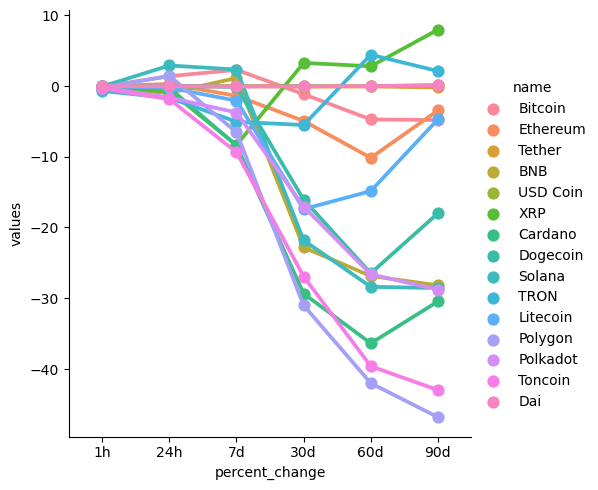

In [71]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

<Axes: xlabel='percent_change', ylabel='values'>

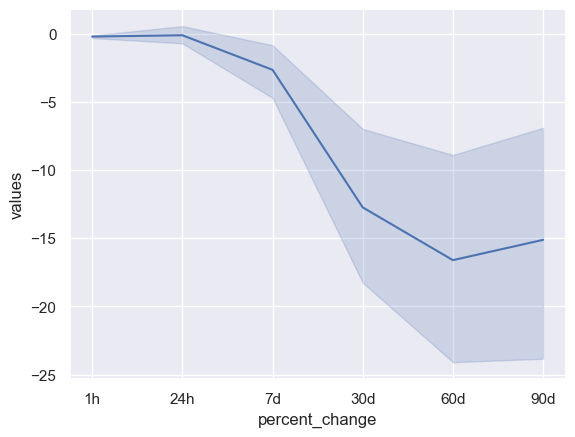

In [93]:
sns.set_theme(style='darkgrid')

sns.lineplot(x = 'percent_change', y = 'values', data = df7)

In [82]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

#We can't visualize this as it has 1 value(row)

,name,quote.USD.price,timestamp
0,Bitcoin,26754.906384,2023-06-20 09:25:05.850794
